# 04. Error Estimator 
In this notebook we load the data from the json-files for RF and XGB respectively. After combining the data we plot different boxplots and calculate the difference of the means between stratified vs. unstratifed of the evaluation metrics.

## Load json data for RF and XGB

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils_boxplots import flatten_data, plot_eval
import numpy as np
import seaborn as sns
from tabulate import tabulate

# remove waringns
import warnings
warnings.filterwarnings("ignore")


#### First: Random Forest
# set file path to json files (change model) -> get names of json files
json_path = "/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/results/rf/"
json_files = os.listdir(json_path)


# load data from json file
data = []
for file in json_files:
    with open(json_path + file) as f:
        data_new = json.load(f)
        data = data + data_new

# flatten dictionary and convert to dataframe
data_all_flatten, keys_dic = flatten_data(data)
df_rf = pd.DataFrame(data_all_flatten)
print('Shape of data', df_rf.shape)
print('Colum names of data', df_rf.columns)
print('Number of Colums', df_rf.columns.shape)
print('Keys of dictionary (', len(keys_dic), ')', keys_dic)


# check for duplicates ind data
print('Duplicates: ', df_rf.astype(str).duplicated().sum())


df_rf.head()

Shape of data (4800, 75)
Colum names of data Index(['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_noise',
       'model_info_transformation', 'model_info_group_size',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae',
       'cv_unstratified_iterations_mean_fit_time',
       'cv_unstratified_iterations_std_fit_time',
       'cv_unstratified_iterat

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,cv_folds_descriptives_unstratified_intersection_area,cv_folds_descriptives_stratified_ks_statistic,cv_folds_descriptives_stratified_p_value,cv_folds_descriptives_stratified_intersection_area,unstratified_best_params_min_samples_split,unstratified_best_params_min_samples_leaf,unstratified_best_params_max_features,stratified_best_params_min_samples_split,stratified_best_params_min_samples_leaf,stratified_best_params_max_features
0,rf,200,100000,8,0,identity,5,5,200,30,...,0.877017,0.025,1.0,0.957862,2,1,8,2,1,6
1,rf,200,100000,8,0,identity,5,5,200,30,...,0.874369,0.025,1.0,0.947189,4,1,7,5,1,6
2,rf,200,100000,8,0,identity,5,5,200,30,...,0.897163,0.025,1.0,0.959497,2,1,7,2,1,7
3,rf,200,100000,8,0,identity,5,5,200,30,...,0.886524,0.025,1.0,0.955489,2,1,6,2,1,5
4,rf,200,100000,8,0,identity,5,5,200,30,...,0.881115,0.025,1.0,0.964351,2,1,7,4,1,5


In [2]:
#### Second: XGBoost
# set file path to json files (change model) -> get names of json files
json_path = "/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/results/xgb/"
json_files = os.listdir(json_path)


# load data from json file
data = []
for file in json_files:
    with open(json_path + file) as f:
        data_new = json.load(f)
        data = data + data_new

# flatten dictionary and convert to dataframe
data_all_flatten, keys_dic = flatten_data(data)
df_xgb = pd.DataFrame(data_all_flatten)
print('Shape of data', df_xgb.shape)
print('Colum names of data', df_xgb.columns)
print('Number of Colums', df_xgb.columns.shape)
print('Keys of dictionary (', len(keys_dic), ')', keys_dic)


# check for duplicates ind data
print('Duplicates: ', df_xgb.astype(str).duplicated().sum())


df_xgb.head()

Shape of data (4800, 87)
Colum names of data Index(['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_noise',
       'model_info_transformation', 'model_info_group_size',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae',
       'cv_unstratified_iterations_mean_fit_time',
       'cv_unstratified_iterations_std_fit_time',
       'cv_unstratified_iterat

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,unstratified_best_params_max_depth,unstratified_best_params_learning_rate,unstratified_best_params_gamma,unstratified_best_params_colsample_bytree,stratified_best_params_subsample,stratified_best_params_min_child_weight,stratified_best_params_max_depth,stratified_best_params_learning_rate,stratified_best_params_gamma,stratified_best_params_colsample_bytree
0,xgb,200,100000,8,0,identity,5,5,200,20,...,2,0.222667,1.000000,0.687279,0.847472,2,2,0.311333,1.000000,0.982669
1,xgb,200,100000,8,0,identity,5,5,200,20,...,2,0.267000,3.786479,0.982669,0.729761,6,2,0.222667,3.786479,0.982669
2,xgb,200,100000,8,0,identity,5,5,200,20,...,2,0.267000,1.945888,0.548831,0.997877,2,2,0.222667,1.000000,0.585893
3,xgb,200,100000,8,0,identity,5,5,200,20,...,2,0.222667,1.945888,0.982669,0.997877,4,2,0.134000,1.000000,0.517950
4,xgb,200,100000,8,0,identity,5,5,200,20,...,17,0.178333,1.394951,0.976185,0.697330,6,3,0.222667,1.394951,0.548831


In [3]:
data = pd.concat([df_rf, df_xgb], axis=0, ignore_index=True)
original_shape = data.shape[0]

In [4]:
# opitonal: exclude all rows if hyperparmeters are the same
exclude_hyp_dame = False
if exclude_hyp_dame:
    data = data[data['hyperparameters_same'] == False]
    data = data.reset_index(drop=True) #reset index of data
    print('Original shape: ', original_shape)
    print('Shape after removing hyperparameters that are the same: ', data.shape[0])
    print('Percetage', data.shape[0]/original_shape)
    data.head()
 

In [5]:
# creat unique identifier for plots
model_vars = ['model_info_n_train',	'model_info_noise',	'model_info_group_size']
model_vars_title =  [s.rsplit('_', 1)[-1] for s in model_vars]

data['param_model'] = data.loc[:, model_vars].astype(str).agg('_'.join, axis=1)
print('Shape of data', data.shape)
data['param_model'].head()

Shape of data (9600, 100)


0    200_0_5
1    200_0_5
2    200_0_5
3    200_0_5
4    200_0_5
Name: param_model, dtype: object

## Analysis Estimation Error
Add colum with calculated error_estimator_stratified and their mean over the Random Search Iteratons:


In [6]:
data['error_estimator_stratified'] = data['param_model'] 
data['error_estimator_unstratified'] = data['param_model'] 

for i in range(len(data)):
    # Note: cv_stratified_iterations_mean_test_score is negagtive MSE, wherase cv_iteration_refit_test_mse is absolute MSE -> add two values
    # error estimate: stratified
    data['error_estimator_stratified'][i] =  [(x + y)**2 for x, y in zip(data['cv_stratified_iterations_mean_test_score'][i], data['cv_iteration_refit_test_mse'][i])]
    # error estimate: unstratified
    data['error_estimator_unstratified'][i]   = [(x + y)**2 for x, y in zip(data['cv_unstratified_iterations_mean_test_score'][i], data['cv_iteration_refit_test_mse'][i])]

print(len(data['error_estimator_stratified'][0]))
print(len(data['error_estimator_stratified']))


data['error_estimator_mean_stratified'] = data['error_estimator_stratified'].apply(lambda x: np.mean(x))
data['error_estimator_mean_unstratified'] = data['error_estimator_unstratified'].apply(lambda x: np.mean(x))

200
9600


### Boxplot RF vs. XGB

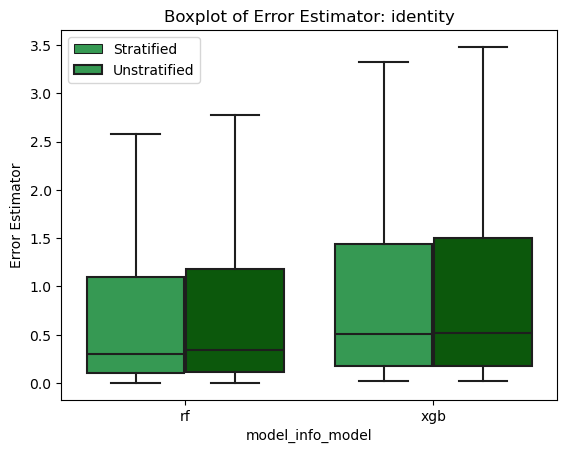

  Expermintel Hyperparameter Combinaiton Stratification      Mean        SD
0                                     rf     stratified  1.178537  2.707050
1                                     rf   unstratified  1.369989  3.454643
2                                    xgb     stratified  1.345669  2.379954
3                                    xgb   unstratified  1.427758  2.675284


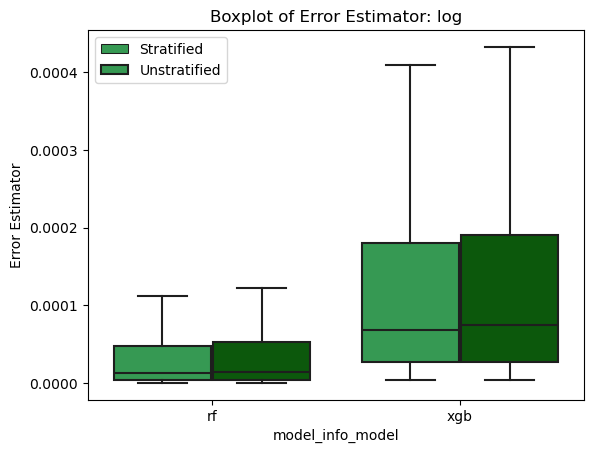

  Expermintel Hyperparameter Combinaiton Stratification      Mean        SD
0                                     rf     stratified  0.000060  0.000162
1                                     rf   unstratified  0.000066  0.000169
2                                    xgb     stratified  0.000176  0.000313
3                                    xgb   unstratified  0.000189  0.000341


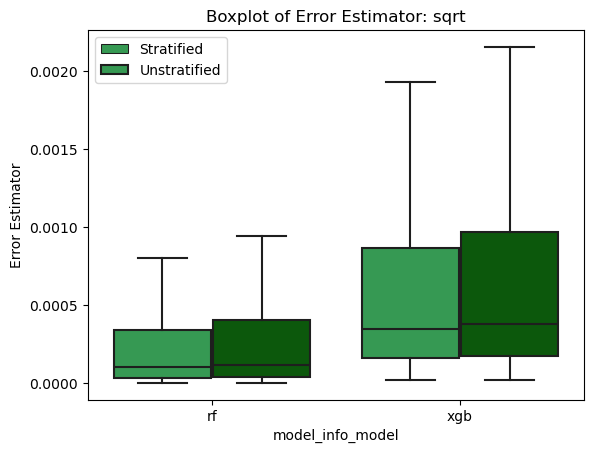

  Expermintel Hyperparameter Combinaiton Stratification      Mean        SD
0                                     rf     stratified  0.000359  0.000814
1                                     rf   unstratified  0.000396  0.000823
2                                    xgb     stratified  0.000797  0.001311
3                                    xgb   unstratified  0.000902  0.001465


In [7]:
transformations = data['model_info_transformation'].unique()

for transformation in transformations:
    data_error= data[data['model_info_transformation'] == transformation]
    # make data long
    data_error_long = data_error.melt(id_vars=['model_info_model'], 
                                               value_vars=['error_estimator_mean_stratified', 'error_estimator_mean_unstratified'], 
                                               var_name='stratification', value_name='error')


    sns.boxplot(x=data_error_long['model_info_model'], 
                y=data_error_long['error'], 
                hue=data_error_long['stratification'], 
                palette=['#26A94C', 'darkgreen'],
                showfliers=False, )  # hide outliers
    plt.legend(labels=['Stratified', 'Unstratified'])
    plt.ylabel('Error Estimator')
    plt.title('Boxplot of Error Estimator: ' + transformation)
    plt.show()

    # check N per boxplot
    grouped = data_error_long.groupby(['model_info_model', 'stratification'])
    grouped.size().reset_index(name='counts')
    data.groupby(['model_info_model', 'model_info_transformation']).size().reset_index(name='counts')

    # Descreptive table
    descriptives = grouped.describe()
    keys = descriptives['error']['mean'].keys()
    descriptives_table = pd.DataFrame({'Expermintel Hyperparameter Combinaiton': keys.get_level_values('model_info_model'), 
                                       'Stratification': keys.get_level_values('stratification').str.rsplit('_', n=1).str[-1], 
                                       'Mean': descriptives['error']['mean'].values, 
                                       'SD': descriptives['error']['std'].values})
    print(descriptives_table)


### First version: Boxpot Estimation Error per unique experimental parameter combination
Boxplots per unique experimental parameter combination comparing strativied vs. unstratified: 

In [8]:
'''
transformations = data['model_info_transformation'].unique()
models = data['model_info_model'].unique()
differences_table_all = pd.DataFrame()

for model in models: 
    for transformation in transformations:
       
        data_error = data[(data['model_info_transformation'] == transformation) & (data['model_info_model'] == model)]

        # make data long
        data_error_long = data_error.melt(id_vars=['param_model'], 
                                                value_vars=['error_estimator_mean_stratified', 'error_estimator_mean_unstratified'], 
                                                var_name='stratification', value_name='error')
        data_error_long.groupby(['param_model', 'stratification'])
        data_error_long.sort_values(['param_model'])  
        
        #plot
        plt.title('Boxplot of Error Estimator: ' + transformation + ' & ' + model)
        sns.boxplot(x=data_error_long['param_model'], 
                    y=data_error_long['error'], 
                    hue=data_error_long['stratification'], 
                    palette=['#26A94C', 'darkgreen'],
                    showfliers=False, )  # hide outliers
        plt.legend(labels=['Stratified', 'Unstratified'], loc='lower right')
        plt.xticks(rotation=90)  # rotate x labels by 90 degrees
        plt.show()

        # check N per boxplot
        grouped = data_error_long.groupby(['param_model', 'stratification'])
        grouped.size().reset_index(name='counts')
        data.groupby(['model_info_model', 'model_info_transformation']).size().reset_index(name='counts')
        # Deacreptive table
        descriptives = grouped.describe()
        keys = descriptives['error']['mean'].keys()
        descriptives_table = pd.DataFrame({'Expermintel Hyperparameter Combinaiton': keys.get_level_values('param_model'), 
                                           'Stratification': keys.get_level_values('stratification').str.rsplit('_', n=1).str[-1], 
                                           'Mean': descriptives['error']['mean'].values, 
                                           'SD': descriptives['error']['std'].values})
        difference_mean =  descriptives_table[descriptives_table['Stratification']==  'stratified']['Mean'].values - descriptives_table[descriptives_table['Stratification']==  'unstratified']['Mean'].values
        difference_sd =  descriptives_table[descriptives_table['Stratification']==  'stratified']['SD'].values - descriptives_table[descriptives_table['Stratification']==  'unstratified']['SD'].values
        differences = pd.DataFrame({'Expermintel Hyperparameter Combinaiton': keys.get_level_values('param_model').unique(), 
                                           'Difference Mean': difference_mean, 
                                           'Difference SD': difference_sd})
        differences_table_all = pd.concat([differences_table_all, differences])
        print(descriptives_table)
        print(differences)   
'''

"\ntransformations = data['model_info_transformation'].unique()\nmodels = data['model_info_model'].unique()\ndifferences_table_all = pd.DataFrame()\n\nfor model in models: \n    for transformation in transformations:\n       \n        data_error = data[(data['model_info_transformation'] == transformation) & (data['model_info_model'] == model)]\n\n        # make data long\n        data_error_long = data_error.melt(id_vars=['param_model'], \n                                                value_vars=['error_estimator_mean_stratified', 'error_estimator_mean_unstratified'], \n                                                var_name='stratification', value_name='error')\n        data_error_long.groupby(['param_model', 'stratification'])\n        data_error_long.sort_values(['param_model'])  \n        \n        #plot\n        plt.title('Boxplot of Error Estimator: ' + transformation + ' & ' + model)\n        sns.boxplot(x=data_error_long['param_model'], \n                    y=data_error_lon

### Updated version: Boxpot Estimation Error per unique experimental parameter combination
With ordering and other colouring

In [ ]:
'''
differences_table_all = pd.DataFrame()
# rename colums that startified and unstratified is written at the end
#data = data.rename(columns={'cv_folds_descriptives_stratified_intersection_area': 'cv_folds_descriptives_intersection_area_stratified', 'cv_folds_descriptives_unstratified_intersection_area': 'cv_folds_descriptives_intersection_area_unstratified'})

transformations = data['model_info_transformation'].unique()
models = data['model_info_model'].unique()


for model in models: 
    for transformation in transformations:
       
        data_error = data[(data['model_info_transformation'] == transformation) & (data['model_info_model'] == model)]

        # make data long
        data_error_long = data_error.melt(id_vars=['param_model'], 
                                                value_vars=['error_estimator_mean_stratified', 'error_estimator_mean_unstratified'], 
                                                var_name='stratification', value_name='error')

        # make data long
        data_error_long = data_error.melt(id_vars=['param_model'], 
                                                        value_vars=['error_estimator_mean_stratified', 'error_estimator_mean_unstratified'], 
                                                        var_name='Stratification', value_name='Error')

        # definer ordering of boxplots
        filtered_data = data_error_long[data_error_long['Stratification'] == 'error_estimator_mean_unstratified']
        mean_intersection = filtered_data.groupby(['param_model'])['Error'].mean().reset_index().sort_values(by='Error', ascending=False)

        ### Deacreptives
        descriptives = data_error_long.groupby(['param_model', 'Stratification']).describe()
        keys = descriptives['Error']['mean'].keys()
        # descriptives['Intesection']['count'].values  # check N per boxplot
        descriptives_table = pd.DataFrame({'Expermintel Hyperparameter Combinaiton': keys.get_level_values('param_model'), 
                                                'Stratification': keys.get_level_values('Stratification').str.rsplit('_', n=1).str[-1], 
                                                'Mean': descriptives['Error']['mean'].values, 
                                                'SD': descriptives['Error']['std'].values})
        difference_mean =  descriptives_table[descriptives_table['Stratification']==  'stratified']['Mean'].values - descriptives_table[descriptives_table['Stratification']==  'unstratified']['Mean'].values
        difference_sd =  descriptives_table[descriptives_table['Stratification']==  'stratified']['SD'].values - descriptives_table[descriptives_table['Stratification']==  'unstratified']['SD'].values
        differences = pd.DataFrame({'Expermintel Hyperparameter Combinaiton': keys.get_level_values('param_model').unique(), 
                                                'Difference Mean': difference_mean, 
                                                'Difference SD': difference_sd})
        differences_table_all = pd.concat([differences_table_all, differences])


        ### Plot
        plt.figure(figsize=(6, 3))  # Set the figure size to 10 inches by 6 inches
        plt.title('Boxplot of Estimaton Error: ' + transformation + '&' + model)
        sns.boxplot(x= data_error_long['param_model'], 
                        y= data_error_long['Error'], 
                        hue= data_error_long['Stratification'],  palette={'error_estimator_mean_stratified': '#990073', 
                        'error_estimator_mean_unstratified': 'darkgreen'}, 
                        showfliers=False, # hide outliers
                        order = list(mean_intersection['param_model']))  #showmeans=True, meanline=True
        plt.xticks(rotation=90)  # rotate x labels by 90 degrees
        plt.ylabel('Estimator Error')
        plt.xlabel('Hyperparameter Combination: n_train, noise, group_size')
        legend = plt.legend()
        for i, label in enumerate(legend.get_texts()):
                if label.get_text() == 'error_estimator_mean_stratified':
                        label.set_text('Stratified')
                elif label.get_text() == 'error_estimator_mean_unstratified':
                        label.set_text('Unstratified')
        plt.show()

        differences.sort_values(by='Difference Mean', ascending=False, inplace=True)
        print(differences)
'''

### Function: Boxpot Estimation Error per unique experimental parameter combination

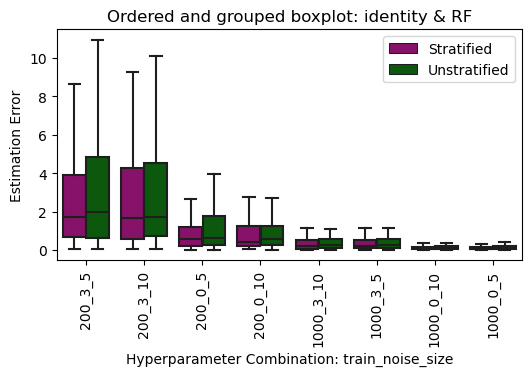

  Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD
1                               1000_0_5        -0.015995      -0.007391
3                               1000_3_5        -0.016160       0.016233
0                              1000_0_10        -0.017973      -0.014962
2                              1000_3_10        -0.044658      -0.038729
4                               200_0_10        -0.136580      -0.209442
5                                200_0_5        -0.239998      -0.211622
6                               200_3_10        -0.484584      -1.134639
7                                200_3_5        -0.575676      -1.773983


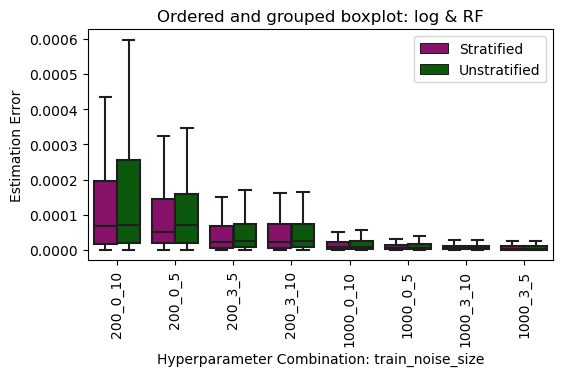

  Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD
3                               1000_3_5    -6.098528e-07      -0.000002
6                               200_3_10    -7.329069e-07       0.000027
2                              1000_3_10    -1.138116e-06      -0.000004
0                              1000_0_10    -1.666627e-06      -0.000001
1                               1000_0_5    -2.041316e-06      -0.000002
7                                200_3_5    -3.099007e-06       0.000012
5                                200_0_5    -1.393378e-05      -0.000019
4                               200_0_10    -2.342129e-05      -0.000028


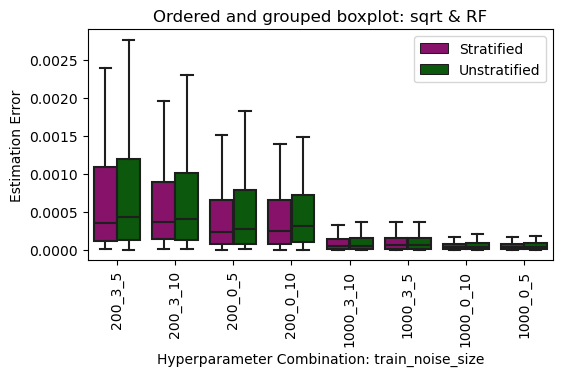

  Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD
3                               1000_3_5        -0.000005      -0.000014
1                               1000_0_5        -0.000007      -0.000004
0                              1000_0_10        -0.000007      -0.000003
2                              1000_3_10        -0.000007      -0.000010
7                                200_3_5        -0.000037      -0.000003
6                               200_3_10        -0.000040       0.000104
4                               200_0_10        -0.000073      -0.000068
5                                200_0_5        -0.000123      -0.000194


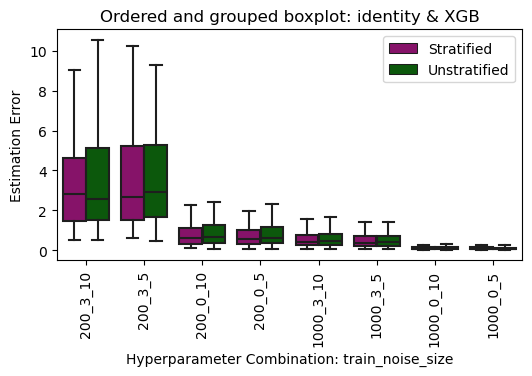

  Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD
0                              1000_0_10        -0.005509      -0.005997
1                               1000_0_5        -0.006062      -0.002184
3                               1000_3_5        -0.007437      -0.008894
2                              1000_3_10        -0.013739       0.013535
5                                200_0_5        -0.066810      -0.048686
4                               200_0_10        -0.067783      -0.042828
6                               200_3_10        -0.092387      -0.438139
7                                200_3_5        -0.396987      -0.822474


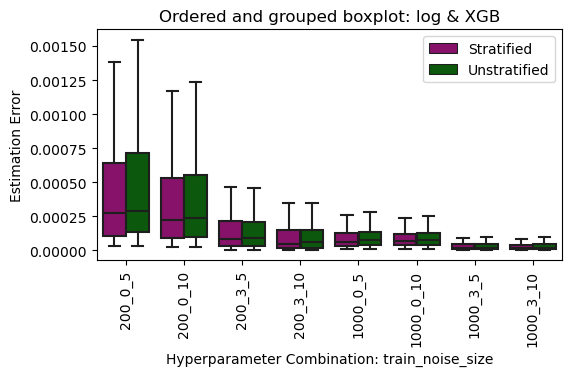

  Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD
3                               1000_3_5        -0.000001      -0.000002
2                              1000_3_10        -0.000001      -0.000003
7                                200_3_5        -0.000003      -0.000005
6                               200_3_10        -0.000004      -0.000005
0                              1000_0_10        -0.000007      -0.000006
1                               1000_0_5        -0.000010      -0.000008
4                               200_0_10        -0.000037      -0.000043
5                                200_0_5        -0.000044      -0.000055


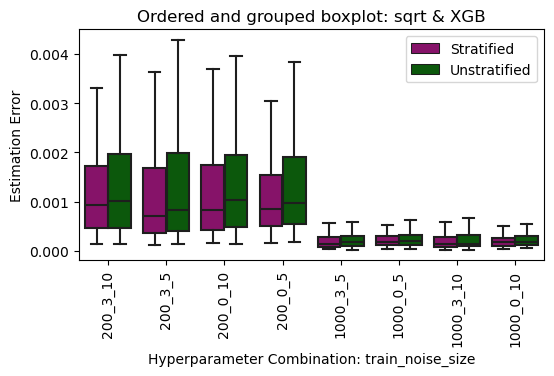

  Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD
2                              1000_3_10        -0.000012      -0.000008
0                              1000_0_10        -0.000020      -0.000015
3                               1000_3_5        -0.000025      -0.000020
1                               1000_0_5        -0.000026      -0.000013
7                                200_3_5        -0.000157      -0.000246
6                               200_3_10        -0.000158      -0.000112
5                                200_0_5        -0.000196      -0.000198
4                               200_0_10        -0.000241      -0.000238


In [12]:
transformations = data['model_info_transformation'].unique()
models = data['model_info_model'].unique()


for model in models: 
    for transformation in transformations: 
        # filter data for transformation and model
        data_filtered = data[(data['model_info_transformation'] == transformation) & (data['model_info_model'] == model)]
        # plot
        differences_table_all = plot_eval(value_vars= ['error_estimator_mean_stratified', 'error_estimator_mean_unstratified'] , 
                                           value_name = 'Estimation Error', 
                                           data = data_filtered, model_vars_title = '_'.join(model_vars_title), 
                                           transformation = transformation, model = model)


### Convert table to latex

In [14]:
from tabulate import tabulate

# Assuming your data is stored in a DataFrame called df
latex_table = tabulate(differences_table_all, tablefmt="latex_raw", headers="keys", showindex=False)
print(latex_table)

\begin{tabular}{rrr}
\hline
   Expermintel Hyperparameter Combinaiton &   Difference Mean &   Difference SD \\
\hline
                                1000_0_10 &      -2.00913e-05 &    -1.45829e-05 \\
                                 1000_0_5 &      -2.60095e-05 &    -1.3408e-05  \\
                                1000_3_10 &      -1.1596e-05  &    -8.47633e-06 \\
                                 1000_3_5 &      -2.46966e-05 &    -2.01186e-05 \\
                                 200_0_10 &      -0.000240531 &    -0.000238263 \\
                                  200_0_5 &      -0.000195769 &    -0.00019809  \\
                                 200_3_10 &      -0.000158017 &    -0.000112429 \\
                                  200_3_5 &      -0.000157158 &    -0.000245609 \\
\hline
\end{tabular}
